# Fifa Player Performance, Ranking and Salary Analysis

DS Project proposal by: <br>
Tsega Abebe (A0242543L) and Jakob Nunnendorf (A0242358A)

## About the data: <br>
Approach: <br>
For our project, we aim to perform exploratory data analysis (EDA) to tell a data-backed story about football. <br>
In the interest of accuracy we have chosen our dataset based on the following criteria: <br>
- High data quality
- Large data quantity
- Strong predictability
- Interesting context

We believe that the dataset FIFA World Cup Player Ratings from kaggle meets all of these criteria because the data originally stems from the EA Sports Fifa game series. EA Sports employs a combination of real-life data, professional scouting, and collaboration with clubs and players to obtain the data. For the purpose of this project we will take this to be the closest available representation of the real world.

We have 18,278 observations and 62 possibly relevant predictors.


# Research Question:
How do the various skill attributes, like dribbling, shooting, and passing, contribute to a player's overall rating in the FIFA World Cup Player Ratings dataset? Is there any skill attribute that stands out as a particularly strong indicator of overall rating?

To perform EDA and answer these research questions, we need to clearly understand the dataset's features, their distribution, and their correlation with the target variable.


# Importing Library

In [29]:
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## Importing Data Set

In [30]:
df = pd.read_csv("players_20.csv")
df.head(5)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


# Exploratory Data Analysis (EDA)

### First we analyse the dataset

### What are the dimensions of the dataset i.e. how many rows and how many columns?

In [31]:
print('Total Number of Rows: ',df.shape[0])
print('Total Number of Columns: ',df.shape[1])

Total Number of Rows:  18278
Total Number of Columns:  104


### What are the columns names and what might be interesting predictors?

In [32]:

predictor_columns = ['height_cm', 'weight_kg', 'overall', 'player_positions', 'skill_moves', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']




### Number of missing values in each column

In [33]:
df.isnull().sum()

sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 104, dtype: int64

### How many missing values for each predictor:

In [34]:
missing_values = df[predictor_columns].isnull().sum().sort_values(ascending=False)
missing_values

gk_speed                      16242
gk_positioning                16242
gk_reflexes                   16242
gk_kicking                    16242
gk_handling                   16242
gk_diving                     16242
dribbling                      2036
defending                      2036
physic                         2036
passing                        2036
shooting                       2036
pace                           2036
mentality_composure               0
power_long_shots                  0
power_strength                    0
mentality_aggression              0
power_stamina                     0
mentality_interceptions           0
mentality_positioning             0
mentality_vision                  0
mentality_penalties               0
height_cm                         0
defending_marking                 0
defending_standing_tackle         0
defending_sliding_tackle          0
goalkeeping_diving                0
power_shot_power                  0
goalkeeping_handling        

It makes sense that non-goal keepers have no goal keeper values. It might be interesting to see how many values we have per position (goalie, defender, midfield, striker).

So first we see how many positions there are and sort them into the four categories.

In [35]:
unique_positions = df['player_positions'].unique()
# create containers for all four categories
goal_keeper_positions = []
defender_positions = []
midfielder_positions = []
striker_positions = []
for position in unique_positions:
  if 'GK' in position:
    goal_keeper_positions.append(position)
  if 'B' in position:
    defender_positions.append(position)
  if position[-1] == 'M' or position[-1] == 'W':
    midfielder_positions.append(position)
  if 'ST' in position:
    striker_positions.append(position)
print("Total number of goalie's positions : {}".format(len(goal_keeper_positions)))
print("Total number of defender's positions: {}".format(len(defender_positions)))
print("Total number of midfielder's positions: {}".format(len(midfielder_positions)))
print("Total number of striker's positions: {}".format(len(striker_positions)))


Total number of goalie's positions : 1
Total number of defender's positions: 311
Total number of midfielder's positions: 387
Total number of striker's positions: 131


Find out how many data points we have per category:

In [36]:
# Create a dictionary to store the count of players in each category
player_count = {
    'Goalie': 0,
    'Defender': 0,
    'Midfielder': 0,
    'Striker': 0,
    'Sum': 0,
    'Unique': 0,
    'Rows': 0
}

for index, row in df.iterrows():
    player_count['Rows'] += 1
    positions = row['player_positions']
    if positions in goal_keeper_positions:
        player_count['Goalie'] += 1
    if positions in defender_positions:
        player_count['Defender'] += 1
    if positions in midfielder_positions:
        player_count['Midfielder'] += 1
    if positions in striker_positions:
        player_count['Striker'] += 1
    if positions in unique_positions:
        player_count['Unique'] += 1
    player_count['Sum'] = player_count['Goalie'] + player_count['Defender'] + player_count['Midfielder'] + player_count['Striker']

# Print the counts of players in each category
for category, count in player_count.items():
    print(f"{category}: {count}")


Goalie: 2036
Defender: 6610
Midfielder: 8138
Striker: 3255
Sum: 20039
Unique: 18278
Rows: 18278


This makes sense, we have a total of 18278 players and the categories sum up to 20039. Some players for example play as both midfielder and striker. Because each categorie has different target characteristics, it will make sense to separate them accordingly.

## The distribution of values for each skill attribute

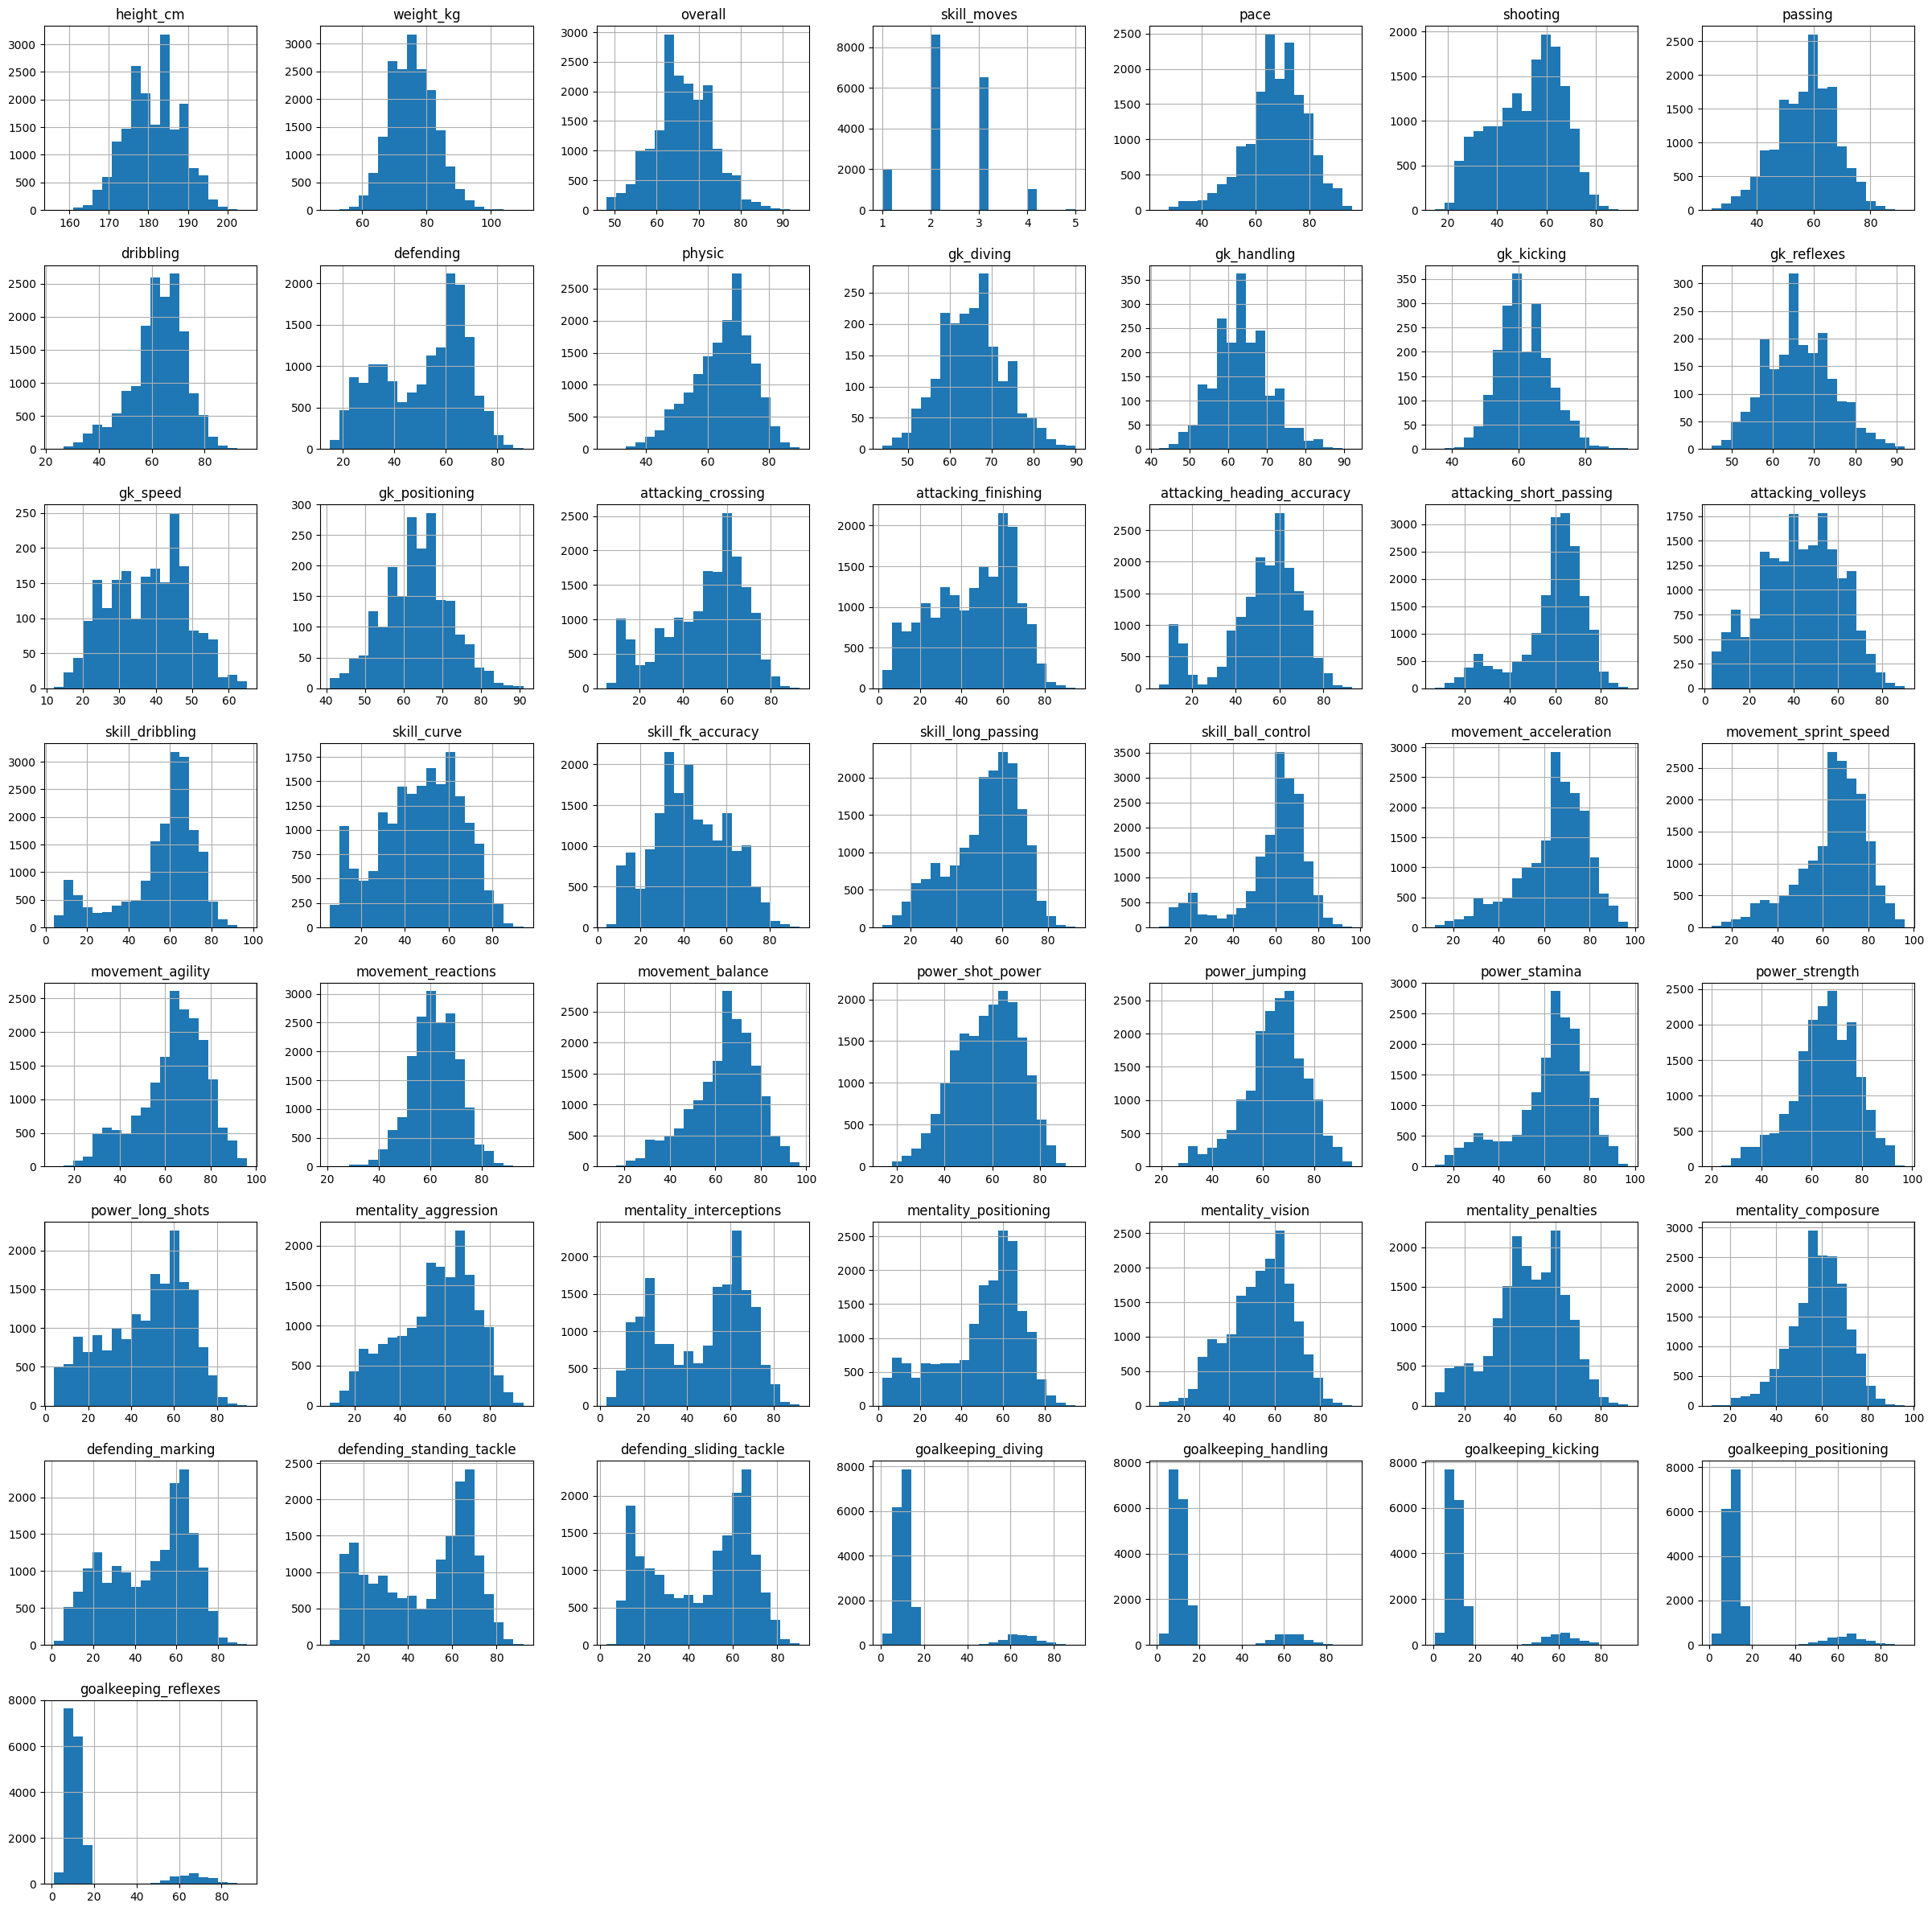

In [37]:
df = df[predictor_columns]
df.hist(bins=20, figsize=(30, 30), grid=True)
plt.show()

The histograms help us understand the distribution of all skills which can give us insight into how we should prepare the subsets that we analyse.

For example, we can see that there are clusters in some histogram which makes sense because there are different skill sets that matter for different positions.

Now we want to separate the dataframes and look again

In [38]:
# Create separate DataFrames for each position
goalie_df = df[df['player_positions'].isin(goal_keeper_positions)]
defender_df = df[df['player_positions'].isin(defender_positions)]
midfielder_df = df[df['player_positions'].isin(midfielder_positions)]
striker_df = df[df['player_positions'].isin(striker_positions)]

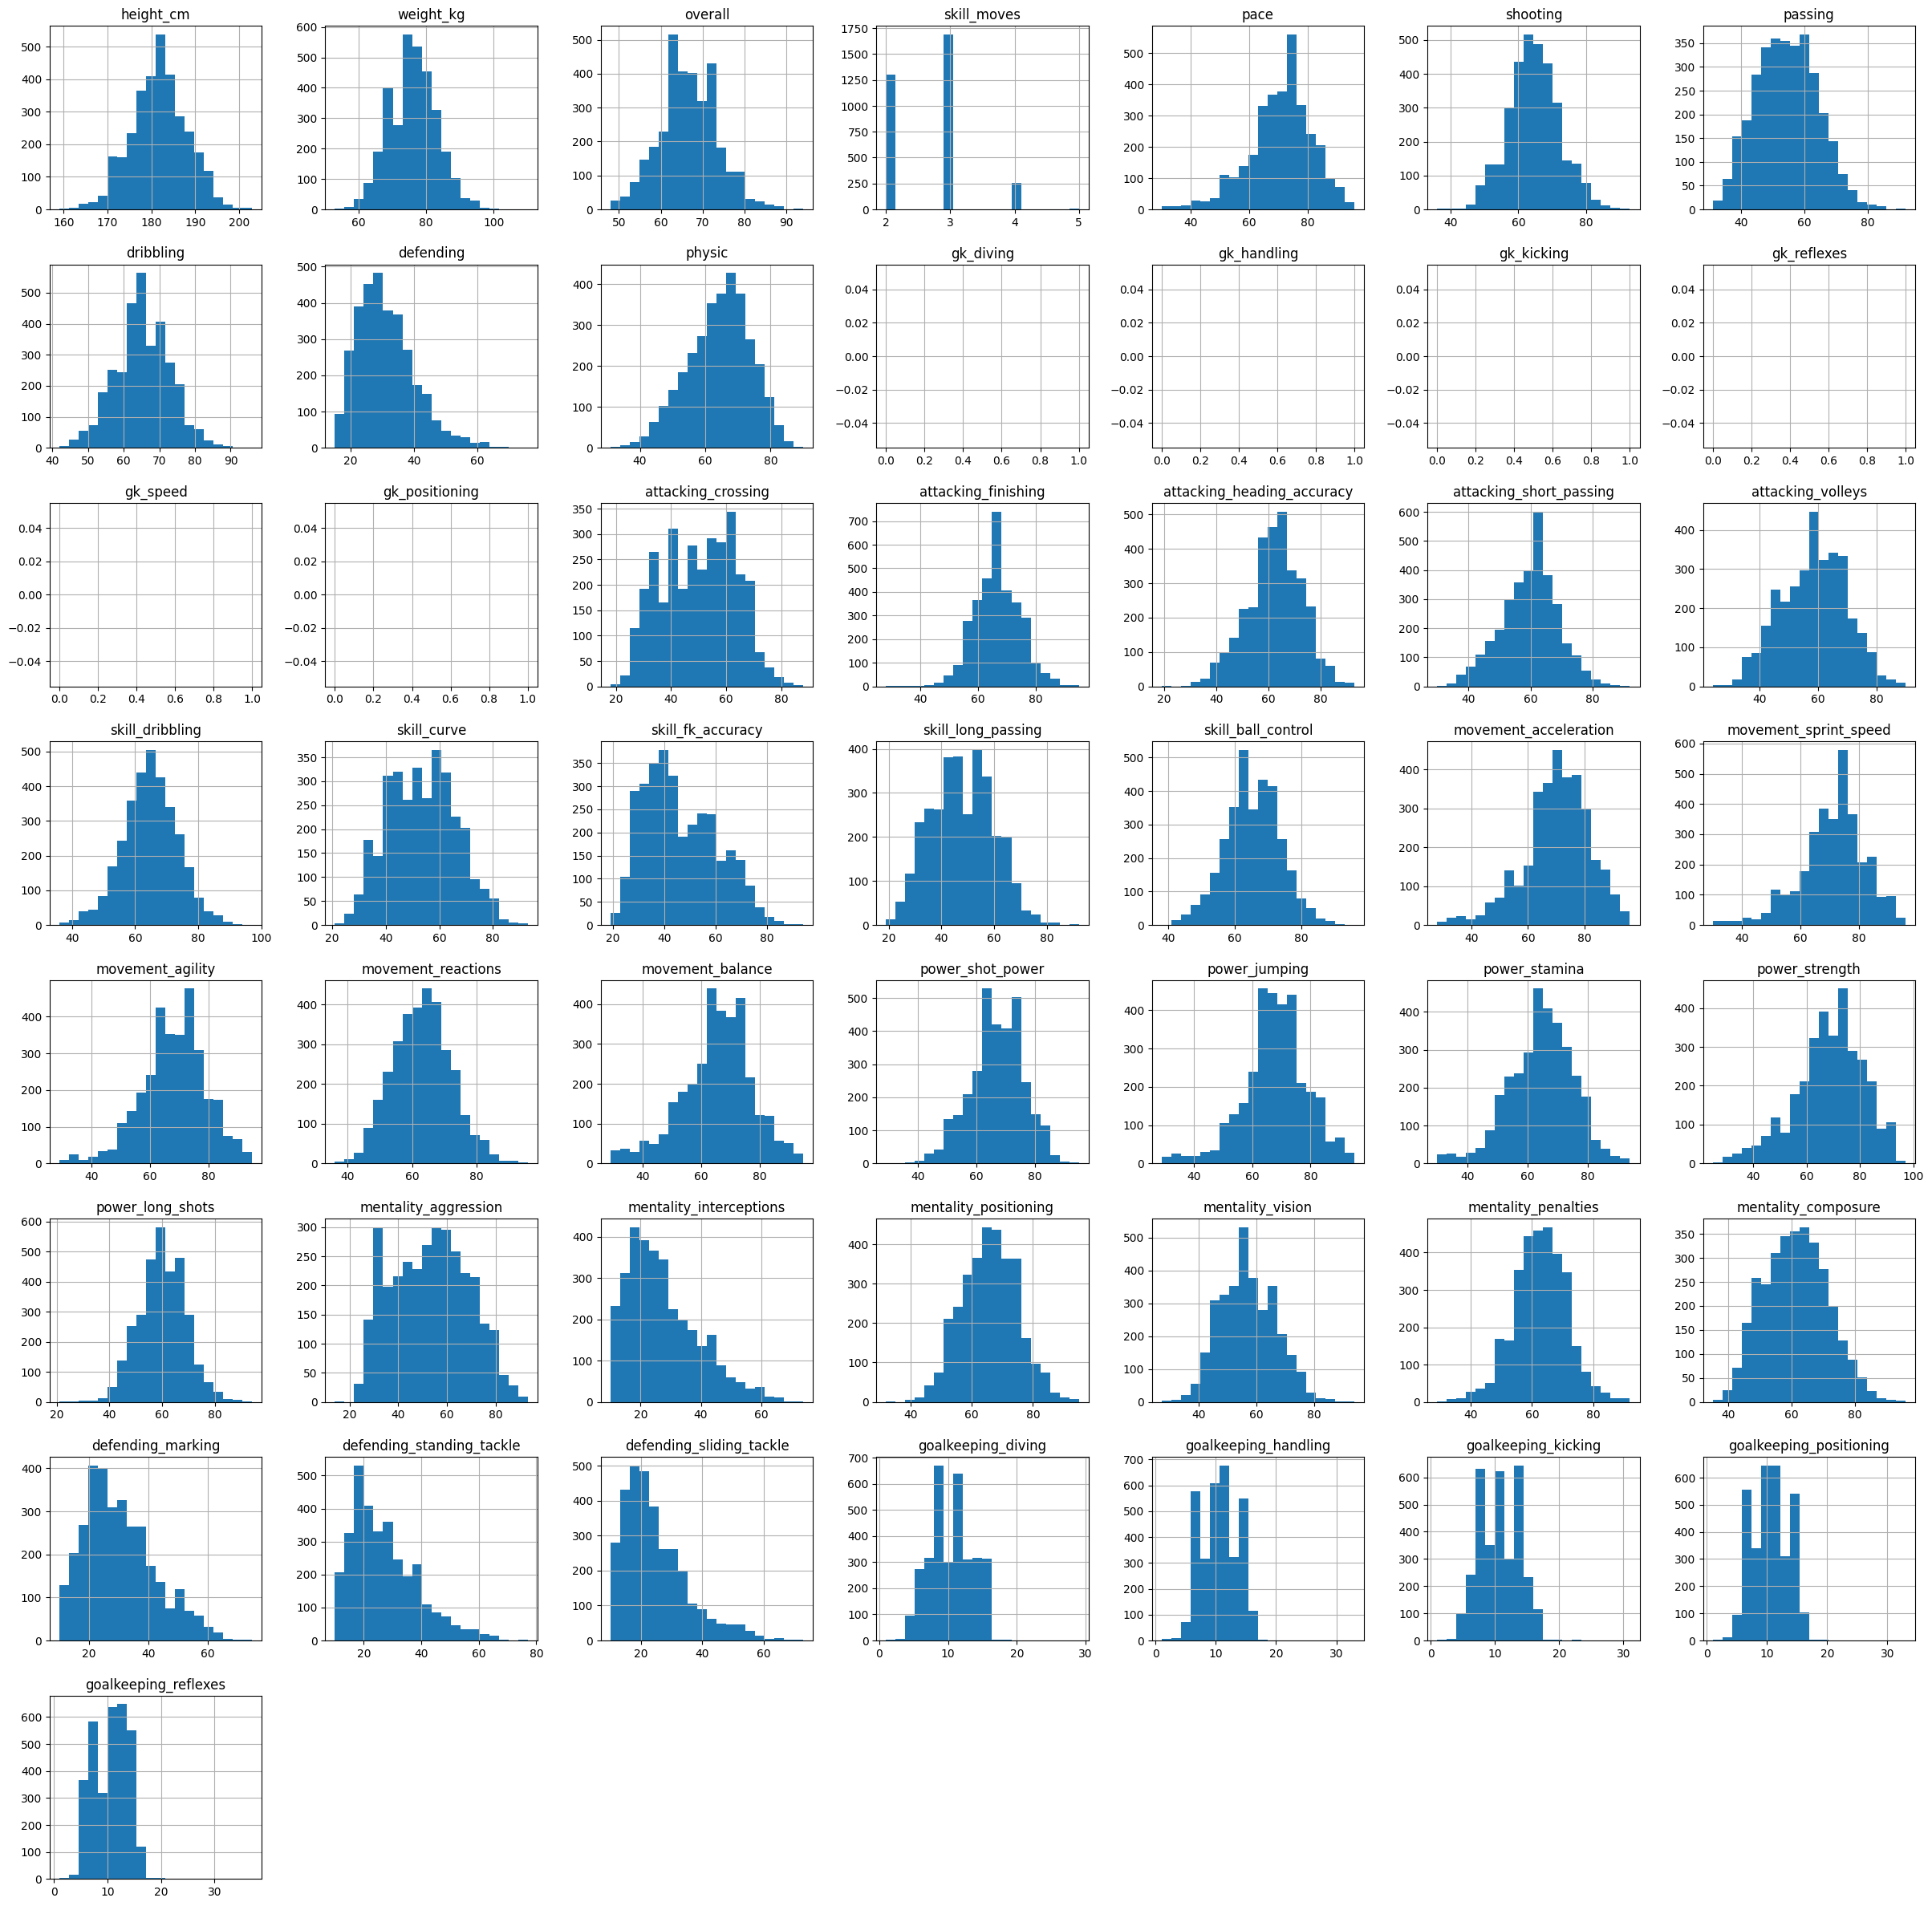

In [39]:
striker_df = striker_df[predictor_columns]
striker_df.hist(bins=20, figsize=(30, 30), grid=True)
plt.show()

For strikers we dont have these clusters anymore probably because strikers have quite isolated functions i.e. only attacking and not defending at all. For sake of conciceness we shall direct our main focus at strikers.

Now we look at the correlations between skill attributes and overall rating in each category

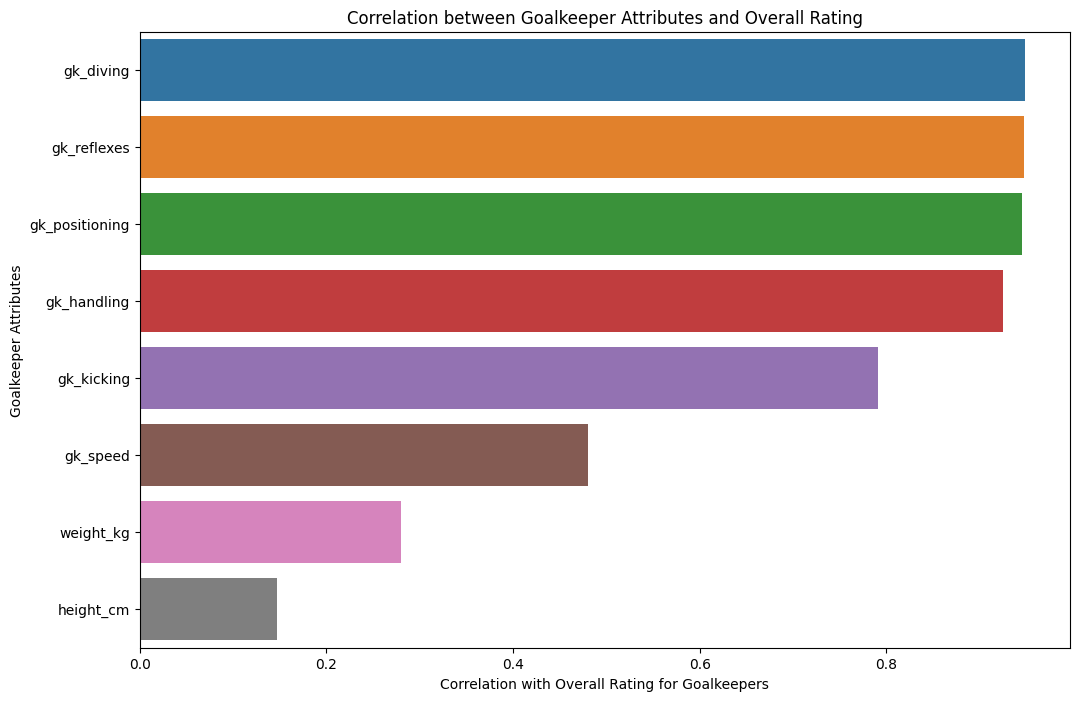

In [40]:
# set up goalie frame
goalie_attributes = ['overall', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'height_cm', 'weight_kg' ]
goalie_relevant_df = goalie_df[goalie_attributes]

# correlations
goalie_corr_matrix = goalie_relevant_df.corr()
goalie_overall_corr = goalie_corr_matrix['overall']
sorted_goalie_overall_corr = goalie_overall_corr.sort_values(ascending=False)
sorted_goalie_overall_corr = sorted_goalie_overall_corr.drop('overall') #remove self corr

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_goalie_overall_corr.values, y=sorted_goalie_overall_corr.index)
plt.xlabel('Correlation with Overall Rating for Goalkeepers')
plt.ylabel('Goalkeeper Attributes')
plt.title('Correlation between Goalkeeper Attributes and Overall Rating')
plt.show()


The weak correlation between height_cm' and 'weight_kg' with the overall assessment for goalkeepers could possibly be attributed to the fact that physical traits are not the main determinants affecting a goalkeeper's performance. Goalkeepers predominantly depend on their quick reactions, placement, handling, and diving skills, which could overshadow the influence of their height and weight.

To graphically depict the association between 'height_cm' and 'weight_kg', and the overall assessment, we generated scatter diagrams.

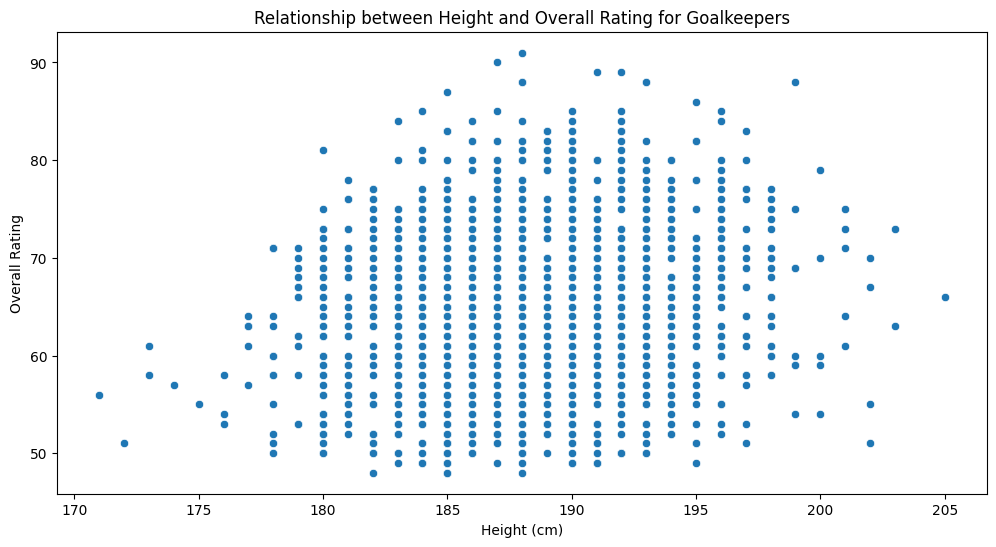

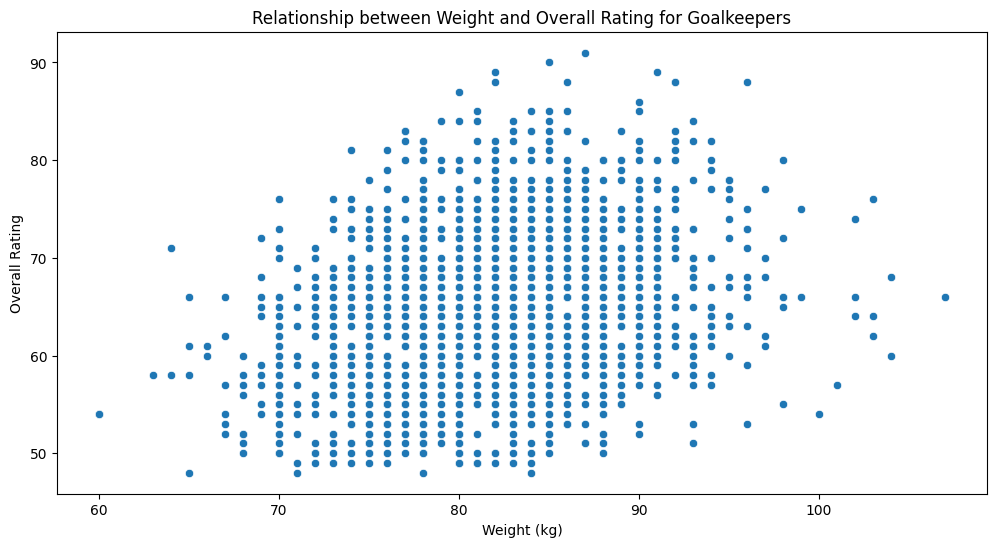

In [41]:
# Add 'height_cm' and 'weight_kg' to the goalie_attributes list
goalie_attributes = ['overall', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'height_cm', 'weight_kg']

# Update the DataFrame
goalie_relevant_df = goalie_df[goalie_attributes]

# Scatter plot height
plt.figure(figsize=(12, 6))
sns.scatterplot(x='height_cm', y='overall', data=goalie_relevant_df)
plt.xlabel('Height (cm)')
plt.ylabel('Overall Rating')
plt.title('Relationship between Height and Overall Rating for Goalkeepers')
plt.show()

# Scatter plot weight
plt.figure(figsize=(12, 6))
sns.scatterplot(x='weight_kg', y='overall', data=goalie_relevant_df)
plt.xlabel('Weight (kg)')
plt.ylabel('Overall Rating')
plt.title('Relationship between Weight and Overall Rating for Goalkeepers')
plt.show()


Since the correlation is low, we do not observe a clear pattern or trend in the scatter plots. This further supports the idea that height and weight may not be the primary factors affecting a goalkeeper's overall rating, probably as long as you are above 1.80m

 **MIDFIELDERS**

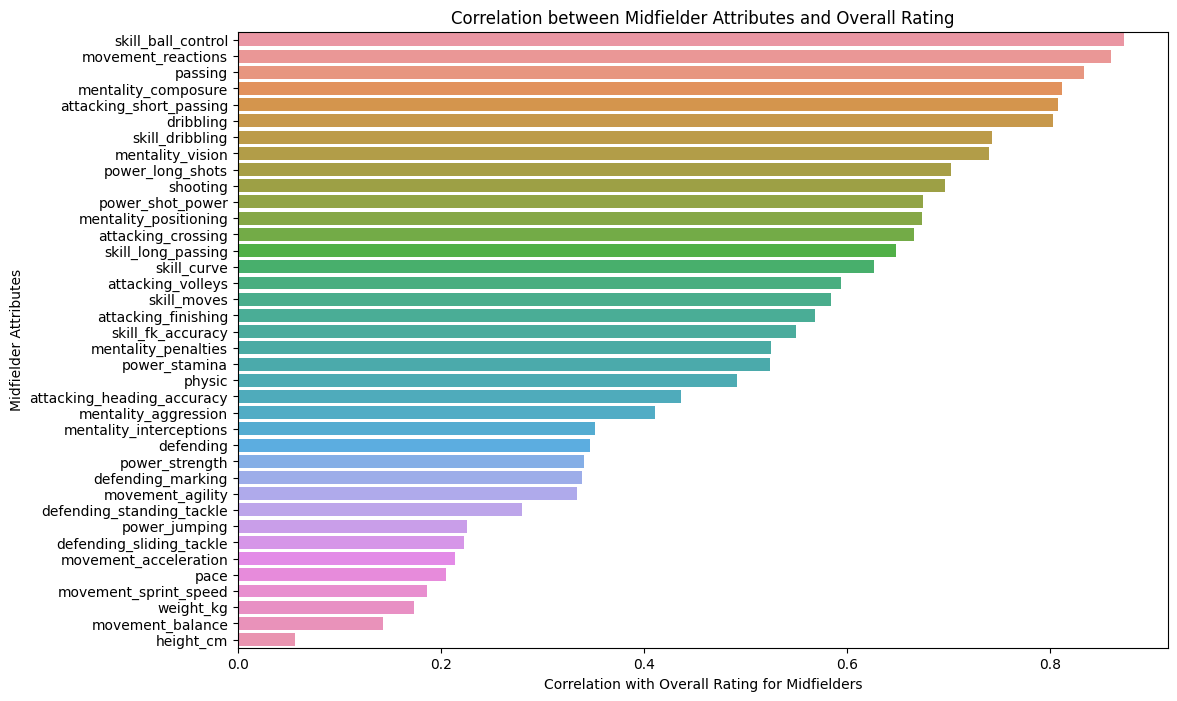

In [42]:
midfielder_attributes = ['overall', 'height_cm', 'weight_kg', 'skill_moves', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle']
midfielder_relevant_df = midfielder_df[midfielder_attributes]

midfielder_corr_matrix = midfielder_relevant_df.corr()
midfielder_overall_corr = midfielder_corr_matrix['overall']

sorted_midfielder_overall_corr = midfielder_overall_corr.sort_values(ascending=False)
sorted_midfielder_overall_corr = sorted_midfielder_overall_corr.drop('overall')
#plot
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_midfielder_overall_corr.values, y=sorted_midfielder_overall_corr.index)
plt.xlabel('Correlation with Overall Rating for Midfielders')
plt.ylabel('Midfielder Attributes')
plt.title('Correlation between Midfielder Attributes and Overall Rating')
plt.show()


Here we can see that a lot of the values that are close to each other are of similar nature. For example power long shots, shooting and power shot power are directly next to each other. So we choose to select a few variables that cover the broadest range of attributes with a low overlap that is ['height_cm', 'weight_kg', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic'].

Here the midfielders ranking of main skills is:
1) passing 2) dribbling 3) shooting 4) physic 5) defending 6) pace 7) weight 8) height

Adjust our datasets to only incorporate those columns

In [43]:
main_attributes = ['overall', 'height_cm', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
defender_relevant_df = defender_df[main_attributes]
midfielder_relevant_df = midfielder_df[main_attributes]
striker_relevant_df = striker_df[main_attributes]

Now we look at defenders

In [44]:
defender_corr_matrix = defender_relevant_df.corr()
defender_overall_corr = defender_corr_matrix['overall']


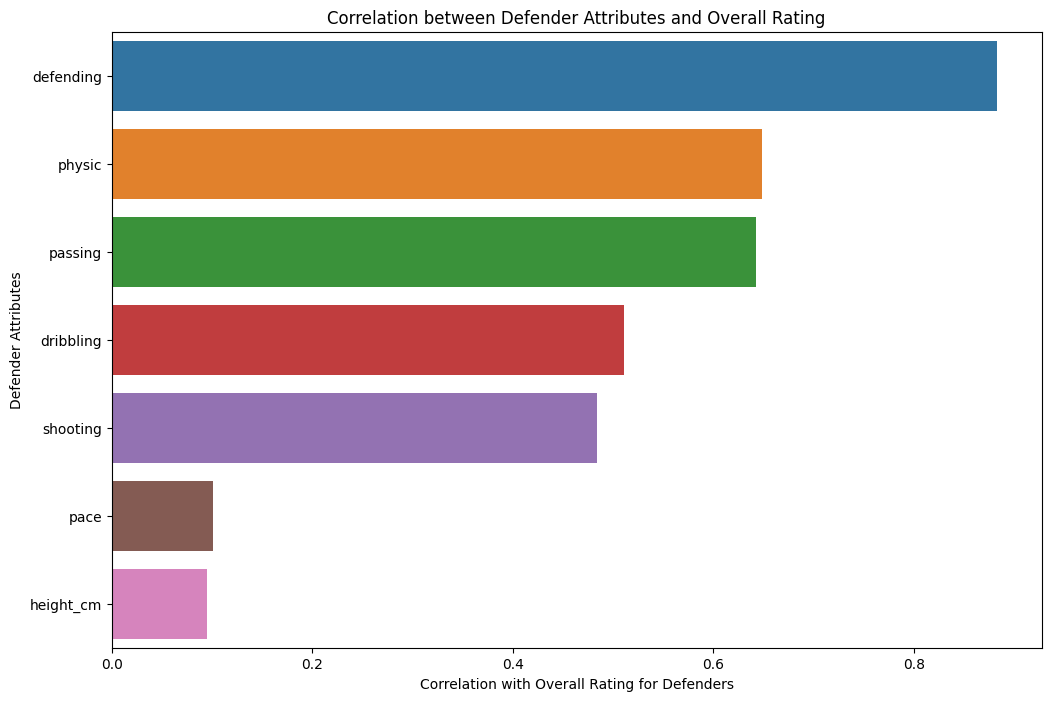

In [45]:
sorted_defender_overall_corr = defender_overall_corr.sort_values(ascending=False)
sorted_defender_overall_corr = sorted_defender_overall_corr.drop('overall')

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_defender_overall_corr.values, y=sorted_defender_overall_corr.index)
plt.xlabel('Correlation with Overall Rating for Defenders')
plt.ylabel('Defender Attributes')
plt.title('Correlation between Defender Attributes and Overall Rating')
plt.show()

Here we get what we expect, the defenders job is to obtain the ball from the striker for that he needs to have a good defending strategies and a strong physic to separate the attacker from the ball. Then he must pass securely so that it doesnt fall back into the opponents arms or in this case feet (pun intended).

In [46]:
striker_corr_matrix = striker_relevant_df.corr()
striker_overall_corr = striker_corr_matrix['overall']


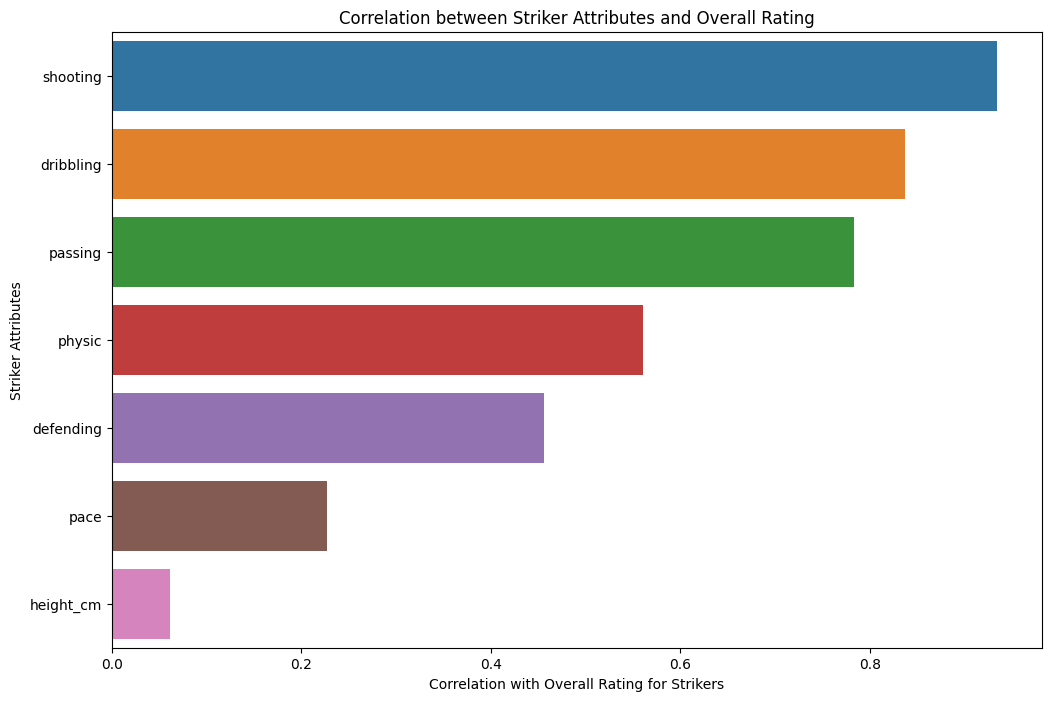

In [47]:
sorted_striker_overall_corr = striker_overall_corr.sort_values(ascending=False)
sorted_striker_overall_corr = sorted_striker_overall_corr.drop('overall')

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_striker_overall_corr.values, y=sorted_striker_overall_corr.index)
plt.xlabel('Correlation with Overall Rating for Strikers')
plt.ylabel('Striker Attributes')
plt.title('Correlation between Striker Attributes and Overall Rating')
plt.show()


For strikers we again get what we expect, their role is to score goals so they need to be good at shooting and dribbling to get past the last defender. Also passing so they can cooperate with the other attackers.

## Now we want to use a regression model to predict the overall ratings of players based on player attributes

we pick only the main attributes

In [48]:
main_attributes = ['overall', 'height_cm', 'weight_kg', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

#adjust df
defender_relevant_df = defender_df[main_attributes]
midfielder_relevant_df = midfielder_df[main_attributes]
striker_relevant_df = striker_df[main_attributes]

Combine all position-specific DataFrames into one:

In [49]:
combined_df = pd.concat([ defender_relevant_df, midfielder_relevant_df, striker_relevant_df])


Prepare the dataset for training and testing:

In [50]:
X = combined_df.drop(columns=['overall'])
y = combined_df['overall']

# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Create and train the linear regression model:

In [51]:
model = LinearRegression()

# train
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)


In [52]:
mse = mean_squared_error(y_test, y_pred) #MSE

# R^2 score
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse:.2f}")
print(f"R^2 score: {r2:.2f}")


Mean squared error: 12.22
R^2 score: 0.73


In [53]:
# coeff for each attribute
coef_df = pd.DataFrame({'Attribute': X.columns, 'Coefficient': model.coef_})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
print(coef_df)


   Attribute  Coefficient
5  dribbling     0.294657
7     physic     0.197433
6  defending     0.116938
3   shooting     0.101576
4    passing     0.087465
1  weight_kg     0.080144
0  height_cm     0.075572
2       pace     0.004249


The larger the coefficient, the stronger the impact of that attribute on the overall rating.

A brief interpretation of our results:

**Dribbling** (Coefficient: 0.294657) Apparently the dribbling skill is weighted the highest for a players overall rating. But it is a relatively low coefficient in comparison to what we observed in the separated sets.

**Physic** (Coefficient: 0.197433) Physic seems to be the second strongest factor probably because it is involved in every position and doesnt create conflicting data patterns.

**Defending** (Coefficient: 0.116938) has a moderate positive impact on the overall rating.

**Shooting** (Coefficient: 0.101576) Probably because it is the most important skill for strikers. 

**passing** (Coefficient: 0.087465) Interesting that passing is not higher because it should be important for all positions

**height_cm** (Coefficient: 0.075572) Relatively unsurprising that height is one of the lowest coefficients.

**Pace** (Coefficient: 0.004249) has the least impact on the overall rating among the attributes considered which is weird because the speed should matter in all positions.

## Check the accuracy of the linear regression model for each player position (defenders, midfielders, and strikers):

In [65]:
def create_and_evaluate_model(df, position):
    X = df.drop(columns=['overall'])
    y = df['overall']
    
    # Split data 80/20
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # make model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    #mean absolute error
    mae = mean_absolute_error(y_test, y_pred)
    
    #R^2 score
    r2 = r2_score(y_test, y_pred)
    
    print(f"{position} Model:")
    print(f"Mean absolute error: {mae:.2f}")
    print(f"R^2 score: {r2:.2f}\n")

create_and_evaluate_model(defender_relevant_df, "Defender")
create_and_evaluate_model(midfielder_relevant_df, "Midfielder")
create_and_evaluate_model(striker_relevant_df, "Striker")

Defender Model:
Mean absolute error: 1.33
R^2 score: 0.93

Midfielder Model:
Mean absolute error: 1.97
R^2 score: 0.85

Striker Model:
Mean absolute error: 1.08
R^2 score: 0.96



**Defender Model:**

1. The defender model has a R^2 score of 0.93 which means that we can account for about 93% of the variance with our model. This means that the few variables we have selected seem to have a very strong bearing on the overall rating which confirms our theory that these encompass the other more detailed attributes.
2.   The mean absolute error is 1.33 so it is actually very accurate.


**Midfielder Model:**

*  The midfielder model explains about 85% of the data. We had suspected it to be slightly less accurate than the other models based on the skill distributions in the previous visualisations.
*  The mean absolute error is also a bit higher at 1.97 but is still quite accurate.

**Striker Model:**

*  Striker is the most accurate model which we also anticipated looking at the most specialised skill distributions amongst the strikers
*  
The mean error is also lowest which makes sense

We can conclude that the models performed well on the training data but we dont know how it performs on unseen data. Because we dont have independent test data we have to rely on cross-validation to check whether the models perform well on different folds.

Defender Model:
Mean absolute error: 1.33
R^2 score: 0.93
Root Mean Squared Error: 1.80



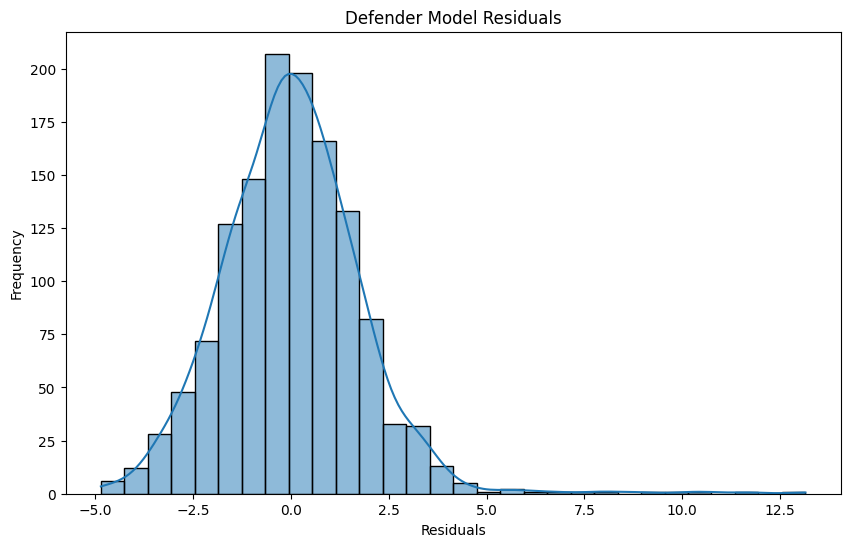

Midfielder Model:
Mean absolute error: 1.97
R^2 score: 0.85
Root Mean Squared Error: 2.67



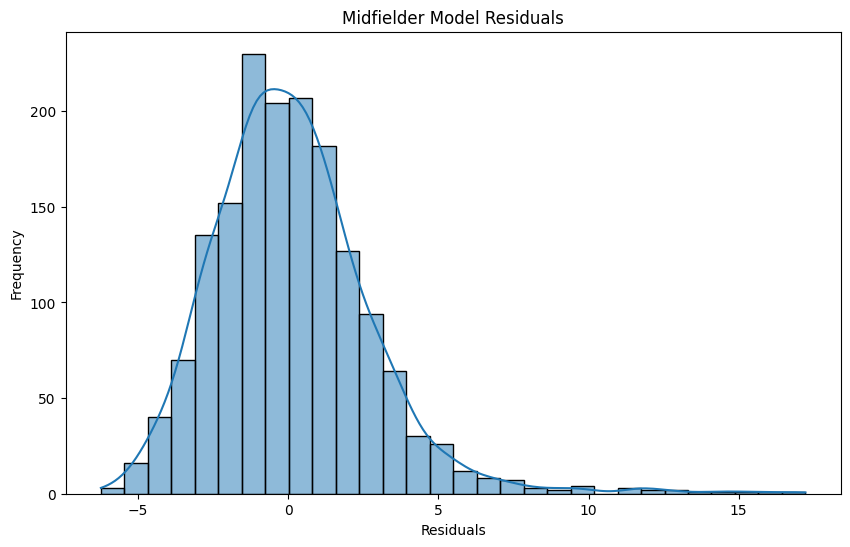

Striker Model:
Mean absolute error: 1.08
R^2 score: 0.96
Root Mean Squared Error: 1.39



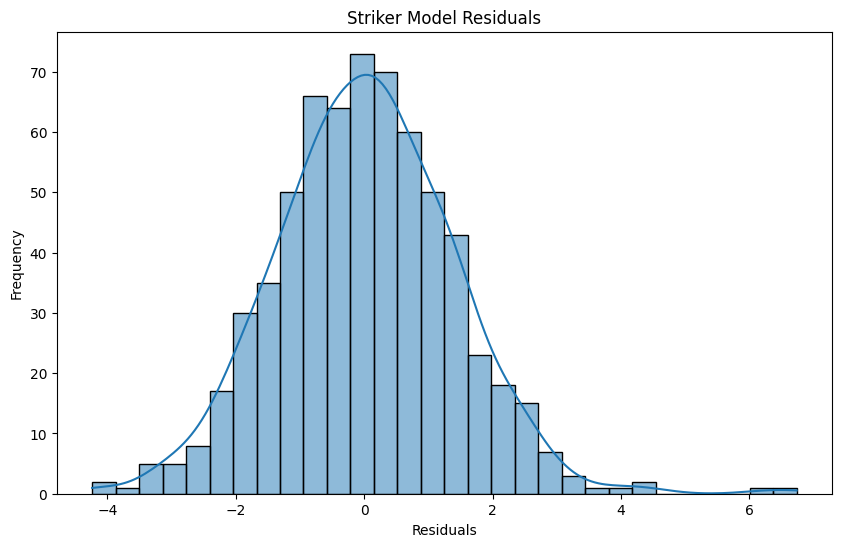

Defender Model (Cross-Validation):
Mean absolute error: 1.73
R^2 score: -1.68
Root Mean Squared Error: 2.36

Midfielder Model (Cross-Validation):
Mean absolute error: 2.42
R^2 score: -2.73
Root Mean Squared Error: 3.10

Striker Model (Cross-Validation):
Mean absolute error: 1.20
R^2 score: -0.09
Root Mean Squared Error: 1.58



In [69]:
def create_and_evaluate_model(df, position):
    # test and training
    X = df.drop(columns=['overall'])
    y = df['overall']
    
    # 80/20 split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # model
    model = LinearRegression(fit_intercept=True)
    
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)# mean absolute error
    
    r2 = r2_score(y_test, y_pred)# R^2 

    # RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f"{position} Model:")
    print(f"Mean absolute error: {mae:.2f}")
    print(f"R^2 score: {r2:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}\n")

    # Plot residuals
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True, bins=30)
    plt.title(f"{position} Model Residuals")
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.show()

def create_and_evaluate_model_cv(df, position):
    X = df.drop(columns=['overall'])
    y = df['overall']
    
    model = LinearRegression(fit_intercept=True)
    
    # Perform 5-fold cross-validation
    cv_mae = -np.mean(cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error'))
    cv_r2 = np.mean(cross_val_score(model, X, y, cv=5, scoring='r2'))
    cv_rmse = np.sqrt(-np.mean(cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')))
    
    print(f"{position} Model (Cross-Validation):")
    print(f"Mean absolute error: {cv_mae:.2f}")
    print(f"R^2 score: {cv_r2:.2f}")
    print(f"Root Mean Squared Error: {cv_rmse:.2f}\n")
    

create_and_evaluate_model(defender_relevant_df, "Defender")
create_and_evaluate_model(midfielder_relevant_df, "Midfielder")
create_and_evaluate_model(striker_relevant_df, "Striker")

create_and_evaluate_model_cv(defender_relevant_df, "Defender")
create_and_evaluate_model_cv(midfielder_relevant_df, "Midfielder")
create_and_evaluate_model_cv(striker_relevant_df, "Striker")


The residuals should not have a pattern and the R^2 score should not be negative. This shows that the models actually perform worse than a horizontal line. Our model apparently does not perform well on unseen data i.e. it is overfitting. We will have to optimise it.

In [71]:
from sklearn.model_selection import cross_validate, KFold

def create_and_evaluate_model_cv(df, position):
    # train n test
    X = df.drop(columns=['overall'])
    y = df['overall']
    
    # linear regression
    model = LinearRegression(fit_intercept=True)
    
    # cross valid
    cv = KFold(n_splits=5, shuffle=True, random_state=42)

    # cross validation
    scores = cross_validate(model, X, y, cv=cv, scoring=['r2', 'neg_mean_absolute_error'], return_estimator=True)

    # mean R^2 scores and mean absolute errors
    mean_r2 = np.mean(scores['test_r2'])
    mean_mae = -np.mean(scores['test_neg_mean_absolute_error'])

    print(f"{position} Model (Cross-Validation):")
    print(f"Mean R^2 score: {mean_r2:.2f}")
    print(f"Mean absolute error: {mean_mae:.2f}\n")

    # calculate average coefficients over the 5 folds
    avg_coefs = np.mean([estimator.coef_ for estimator in scores['estimator']], axis=0)

    print("Average Coefficients:")
    for feature, coef in zip(X.columns, avg_coefs):
        print(f"{feature}: {coef:.4f}")
    print()

create_and_evaluate_model_cv(defender_relevant_df, "Defender")
create_and_evaluate_model_cv(midfielder_relevant_df, "Midfielder")
create_and_evaluate_model_cv(striker_relevant_df, "Striker")


Defender Model (Cross-Validation):
Mean R^2 score: 0.90
Mean absolute error: 1.42

Average Coefficients:
height_cm: 0.0085
weight_kg: 0.0353
pace: 0.0327
shooting: 0.0398
passing: 0.0903
dribbling: 0.0756
defending: 0.5652
physic: 0.1349

Midfielder Model (Cross-Validation):
Mean R^2 score: 0.85
Mean absolute error: 1.99

Average Coefficients:
height_cm: 0.0375
weight_kg: 0.0332
pace: 0.0317
shooting: 0.0765
passing: 0.2073
dribbling: 0.4223
defending: 0.0640
physic: 0.1515

Striker Model (Cross-Validation):
Mean R^2 score: 0.95
Mean absolute error: 1.11

Average Coefficients:
height_cm: 0.0658
weight_kg: 0.0039
pace: 0.0325
shooting: 0.5101
passing: 0.0497
dribbling: 0.2928
defending: 0.0237
physic: 0.0881



In summary, we have effectively created and assessed linear regression models for estimating the overall scores of football players in various positions, specifically defenders, midfielders, and forwards. Our models demonstrated relatively strong predictive capabilities, as indicated by their R^2 values and mean absolute errors:

Defender Model:
Mean R^2 score: 0.90
Mean absolute error: 1.42
Midfielder Model:
Mean R^2 score: 0.85
Mean absolute error: 1.99
Forward Model:
Mean R^2 score: 0.95
Mean absolute error: 1.11

The average coefficients for each role illustrate the relative significance of each attribute in forecasting a player's overall rating. For defenders, the most crucial attribute is defending (0.5652), followed by physic (0.1349) and passing (0.0903). For midfielders, the most vital attribute is dribbling (0.4223), followed by passing (0.2073) and physic (0.1515). For strikers, the most essential attribute is shooting (0.5101), followed by dribbling (0.2928) and physic (0.0881).

We employed cross-validation, particularly K-fold cross-validation, to acquire more dependable performance metrics for the models. This technique allowed us to lessen the likelihood of overfitting and provided a superior understanding of the models' performance on new data.

Throughout this process, we also highlighted the significance of feature selection, focusing on relevant characteristics for each position to enhance the predictive precision of our models. We built the cross-validated models using Python and the scikit-learn library, a popular machine learning library that offers a range of tools for model creation, evaluation, and optimization.

In conclusion, the linear regression models we developed can effectively estimate the overall scores of football players in various positions based on their pertinent attributes. These models can be employed to obtain insights into player performance and guide decisions related to squad composition, player recruitment, and talent cultivation. Future research could explore alternative machine learning methods and include additional features to further improve the models' predictive accuracy.